<a href="https://colab.research.google.com/github/Nishint0001/Mini-Project/blob/main/Loan_Defaulter_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
df=pd.read_csv("loans_data_new.csv")
df.head(3)

,ID,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,...,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate
0,0,Current,5000.0,12,4,AESPA,EE,NaN,21-11-1975,51.52,...,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False,NaN
1,2,Repaid,530.0,14,2,PÄRNU,EE,NaN,25-10-1969,30.32,...,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False,NaN
2,3,Current,5500.0,22,4,TALLINN,EE,NaN,22-11-1965,29.57,...,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False,NaN


# Data Preprocessing part 1


In [71]:
#Remove ID column
df=df.drop("ID",axis=1)
df.head(3)

,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,...,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate
0,Current,5000.0,12,4,AESPA,EE,NaN,21-11-1975,51.52,4.0,...,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False,NaN
1,Repaid,530.0,14,2,PÄRNU,EE,NaN,25-10-1969,30.32,4.0,...,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False,NaN
2,Current,5500.0,22,4,TALLINN,EE,NaN,22-11-1965,29.57,4.0,...,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False,NaN


In [72]:
#checking number of unique values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27917 entries, 0 to 27916
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status                             27917 non-null  object 
 1   Amount                             27917 non-null  float64
 2   ApplicationSignedHour              27917 non-null  int64  
 3   ApplicationSignedWeekday           27917 non-null  int64  
 4   City                               27726 non-null  object 
 5   Country                            27917 non-null  object 
 6   CreditScoreEsEquifaxRisk           5725 non-null   object 
 7   DateOfBirth                        27917 non-null  object 
 8   DebtToIncome                       27876 non-null  float64
 9   Education                          27876 non-null  float64
 10  EmploymentDurationCurrentEmployer  27224 non-null  object 
 11  EmploymentPosition                 27529 non-null  obj

In [73]:
df.shape

(27917, 31)

In [74]:
#Check the number of unique value from all of the object datatype
df.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27917 entries, 0 to 27916
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Status                             27917 non-null  object
 1   City                               27726 non-null  object
 2   Country                            27917 non-null  object
 3   CreditScoreEsEquifaxRisk           5725 non-null   object
 4   DateOfBirth                        27917 non-null  object
 5   EmploymentDurationCurrentEmployer  27224 non-null  object
 6   EmploymentPosition                 27529 non-null  object
 7   LoanDate                           27917 non-null  object
 8   WorkExperience                     27869 non-null  object
 9   DefaultDate                        9280 non-null   object
dtypes: object(10)
memory usage: 2.1+ MB


In [75]:
#Check the number of unique value from all of the object datatype
df.select_dtypes("object").nunique()

Status                                   3
City                                  4528
Country                                  4
CreditScoreEsEquifaxRisk                 6
DateOfBirth                          10923
EmploymentDurationCurrentEmployer        7
EmploymentPosition                    2767
LoanDate                              2389
WorkExperience                           6
DefaultDate                            942
dtype: int64

In [76]:
df=df.drop(columns=["DefaultDate","City","EmploymentPosition"])
df

,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,EmploymentDurationCurrentEmployer,...,LoanDuration,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted
0,Current,5000.0,12,4,EE,NaN,21-11-1975,51.52,4.0,UpTo5Years,...,60,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False
1,Repaid,530.0,14,2,EE,NaN,25-10-1969,30.32,4.0,MoreThan5Years,...,60,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False
2,Current,5500.0,22,4,EE,NaN,22-11-1965,29.57,4.0,MoreThan5Years,...,60,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False
3,Repaid,6900.0,15,3,EE,NaN,05-12-1983,45.75,2.0,MoreThan5Years,...,60,3.0,False,1,19.0,7,4.0,5To10Years,0.0773,False
4,Current,2655.0,10,3,EE,NaN,13-07-1980,25.40,4.0,MoreThan5Years,...,60,3.0,True,0,17.0,2,4.0,5To10Years,0.1898,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27912,Late,3310.0,22,5,FI,NaN,23-04-1975,31.22,3.0,MoreThan5Years,...,60,3.0,False,1,1.0,6,3.0,15To25Years,0.1072,True
27913,Late,2000.0,7,2,FI,NaN,02-10-1976,9.40,3.0,UpTo5Years,...,60,1.0,True,0,1.0,6,1.0,10To15Years,0.1427,True
27914,Repaid,1485.0,14,4,ES,C,05-03-1978,30.13,3.0,MoreThan5Years,...,60,3.0,False,3,14.0,7,1.0,15To25Years,0.5740,False
27915,Current,3000.0,20,2,EE,NaN,17-05-1957,25.35,3.0,UpTo3Years,...,60,1.0,True,0,1.0,6,1.0,MoreThan25Years,0.0772,False


In [77]:
#extracting year on DOB
df["DateOfBirth"]=df["DateOfBirth"].str[6:]
#converting into integer
df["DateOfBirth"]=df["DateOfBirth"].astype(int)

In [78]:
#extracting year on LoanDate
df["LoanDate"]=df["LoanDate"].str[6:]
#converting into integer type
df["LoanDate"]=df["LoanDate"].astype(int)

In [79]:
df.head(9)

,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,EmploymentDurationCurrentEmployer,...,LoanDuration,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted
0,Current,5000.0,12,4,EE,NaN,1975,51.52,4.0,UpTo5Years,...,60,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False
1,Repaid,530.0,14,2,EE,NaN,1969,30.32,4.0,MoreThan5Years,...,60,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False
2,Current,5500.0,22,4,EE,NaN,1965,29.57,4.0,MoreThan5Years,...,60,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False
3,Repaid,6900.0,15,3,EE,NaN,1983,45.75,2.0,MoreThan5Years,...,60,3.0,False,1,19.0,7,4.0,5To10Years,0.0773,False
4,Current,2655.0,10,3,EE,NaN,1980,25.40,4.0,MoreThan5Years,...,60,3.0,True,0,17.0,2,4.0,5To10Years,0.1898,False
5,Current,3190.0,14,4,EE,NaN,1993,40.21,3.0,UpTo1Year,...,60,3.0,False,2,3.0,7,4.0,LessThan2Years,0.6319,False
6,Current,500.0,15,2,EE,NaN,1981,50.22,2.0,UpTo5Years,...,60,1.0,False,1,1.0,5,4.0,15To25Years,0.2510,False
7,Repaid,3720.0,11,5,FI,NaN,1949,60.21,3.0,UpTo2Years,...,60,4.0,True,0,6.0,0,4.0,MoreThan25Years,0.1987,False
8,Late,2500.0,10,2,EE,NaN,1991,48.60,4.0,UpTo1Year,...,60,2.0,False,2,3.0,6,4.0,2To5Years,0.1533,True


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27917 entries, 0 to 27916
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status                             27917 non-null  object 
 1   Amount                             27917 non-null  float64
 2   ApplicationSignedHour              27917 non-null  int64  
 3   ApplicationSignedWeekday           27917 non-null  int64  
 4   Country                            27917 non-null  object 
 5   CreditScoreEsEquifaxRisk           5725 non-null   object 
 6   DateOfBirth                        27917 non-null  int64  
 7   DebtToIncome                       27876 non-null  float64
 8   Education                          27876 non-null  float64
 9   EmploymentDurationCurrentEmployer  27224 non-null  object 
 10  EmploymentStatus                   27735 non-null  float64
 11  ExistingLiabilities                27917 non-null  int

In [81]:
df.select_dtypes("object").nunique()

Status                               3
Country                              4
CreditScoreEsEquifaxRisk             6
EmploymentDurationCurrentEmployer    7
WorkExperience                       6
dtype: int64

# Exploratory Data Analysis


In [88]:
# all columns with data type "object"
categorical=df.select_dtypes("object").columns.tolist()
categorical

['Status',
 'Country',
 'CreditScoreEsEquifaxRisk',
 'EmploymentDurationCurrentEmployer',
 'WorkExperience']

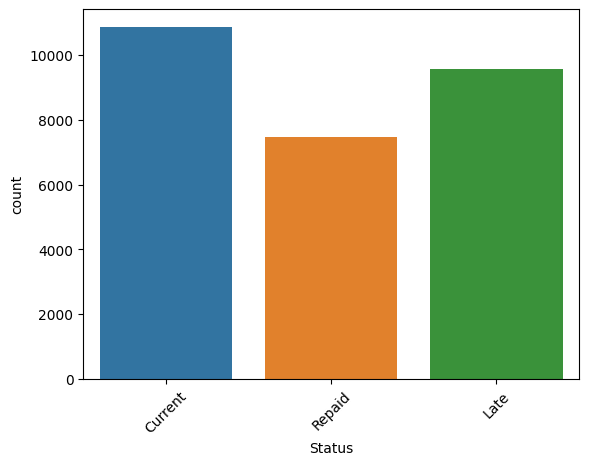

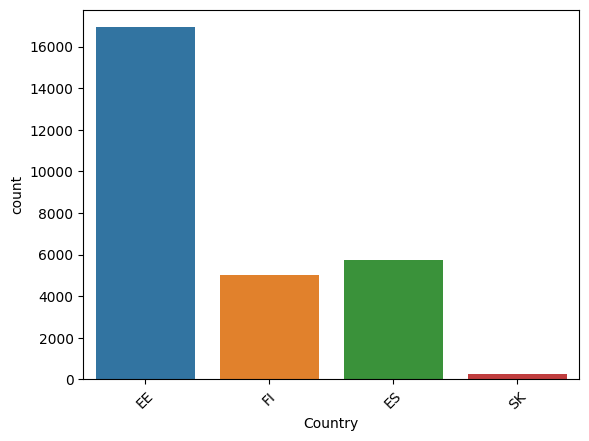

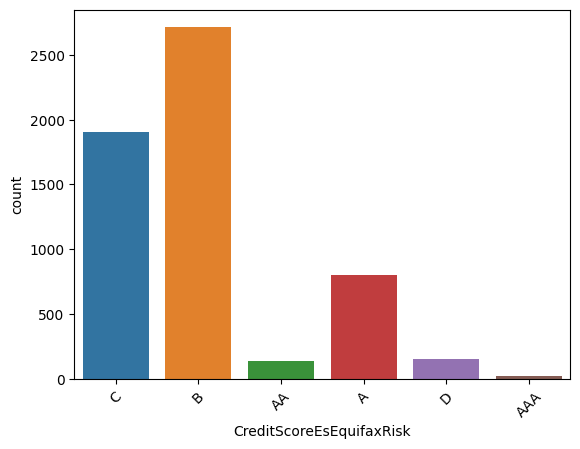

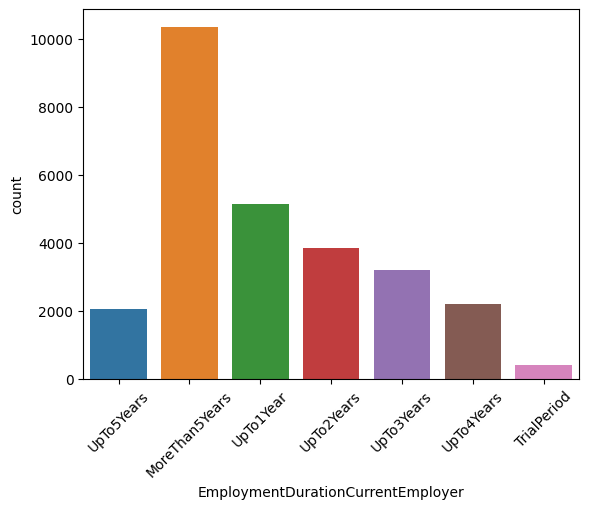

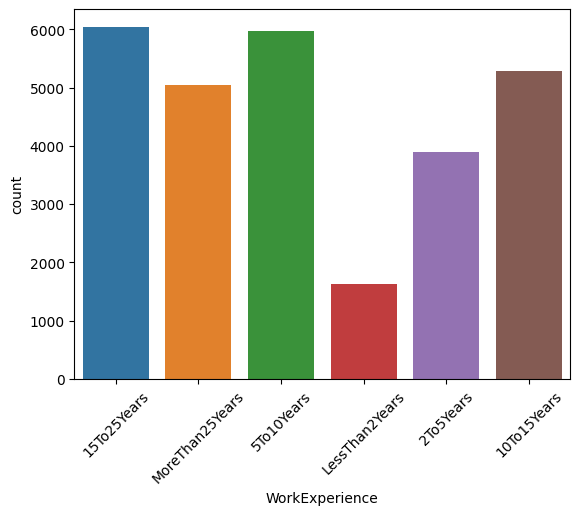

In [101]:
for col in categorical:
  sns.countplot(data=df,x=col)
  plt.xlabel(col)
  plt.ylabel("count")
  plt.xticks(rotation=45)
  plt.show()

In [102]:
#creating a box plot using seaborn for numerical var
numerical=df.select_dtypes(include=["int","float"]).columns.tolist()

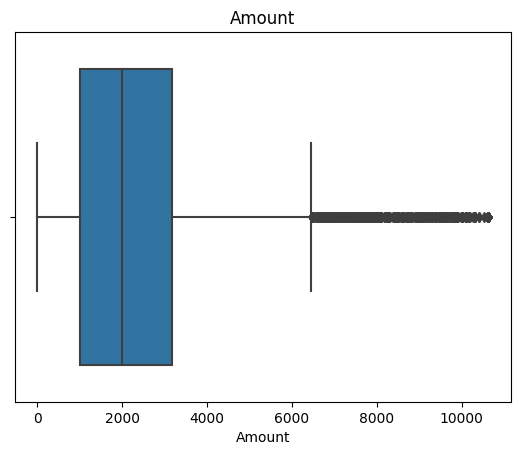

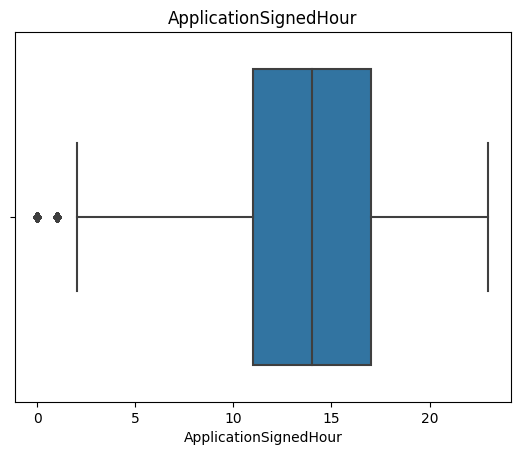

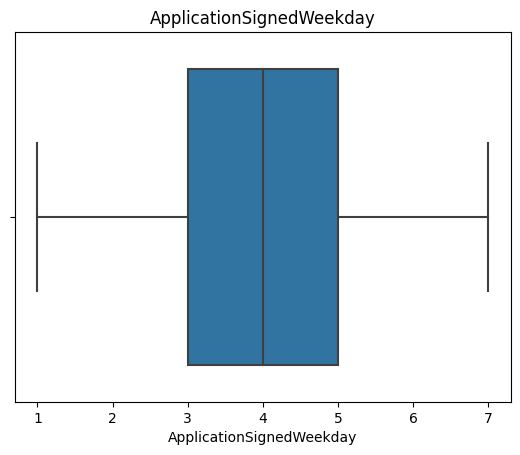

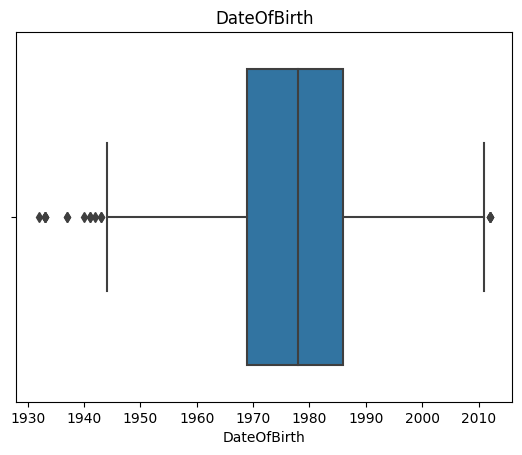

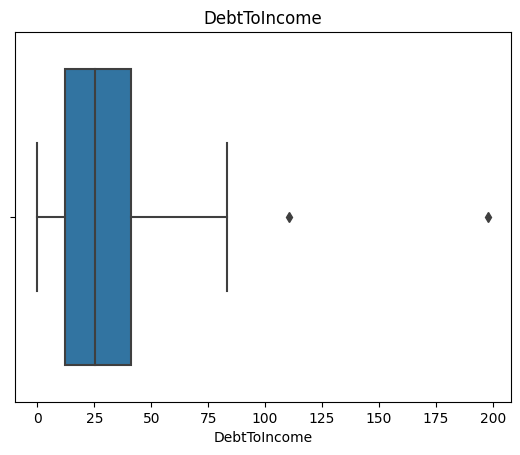

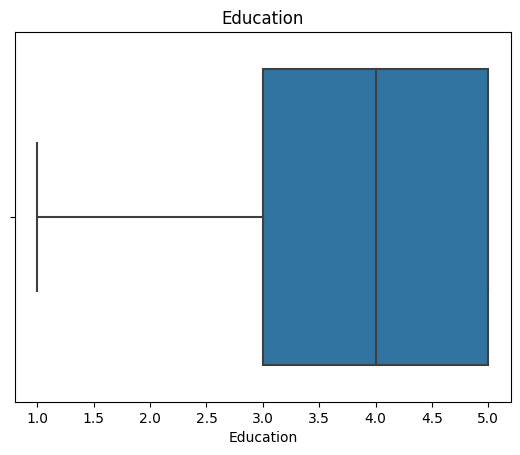

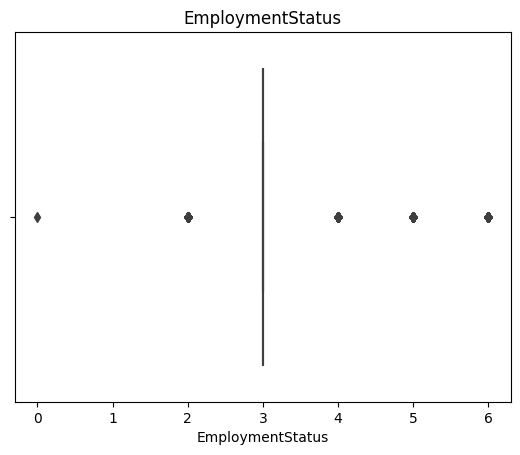

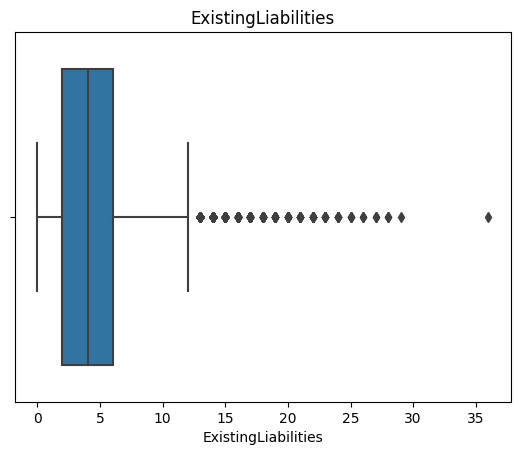

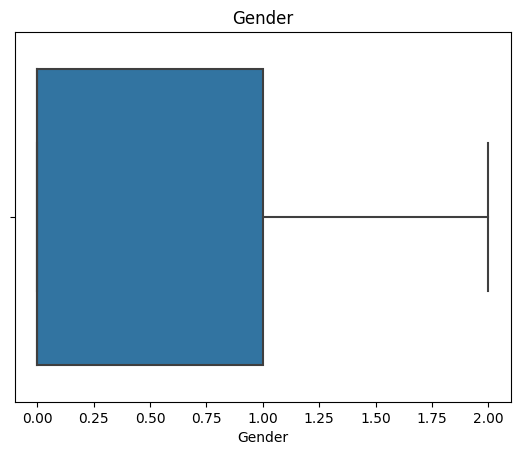

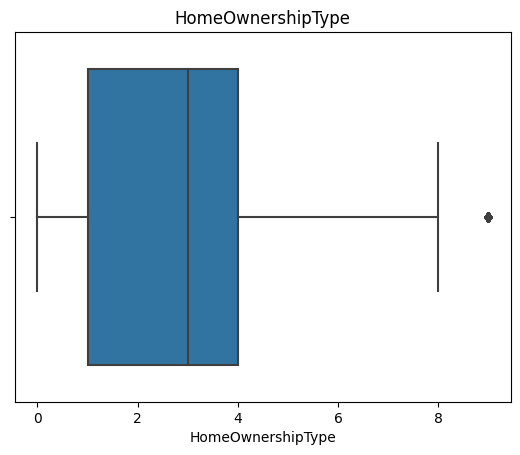

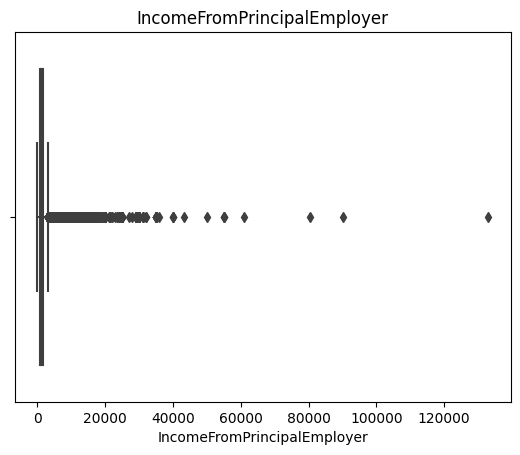

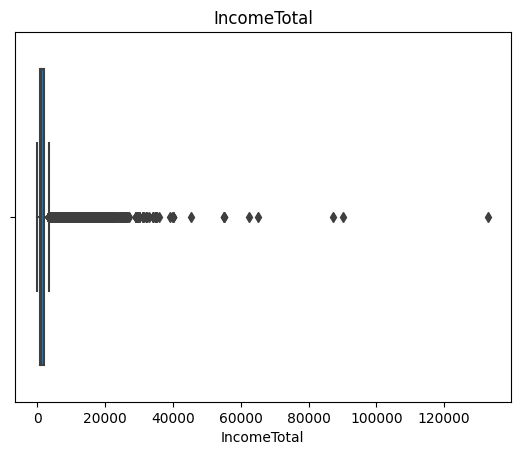

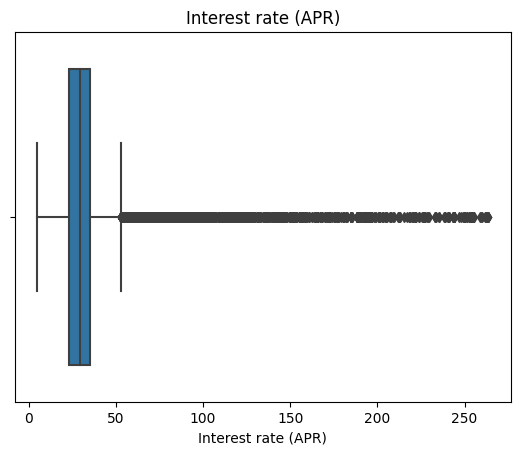

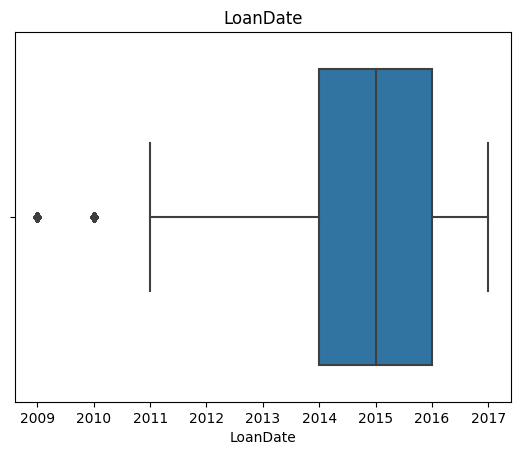

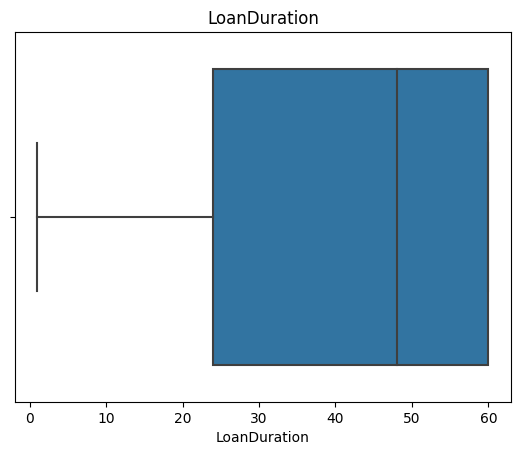

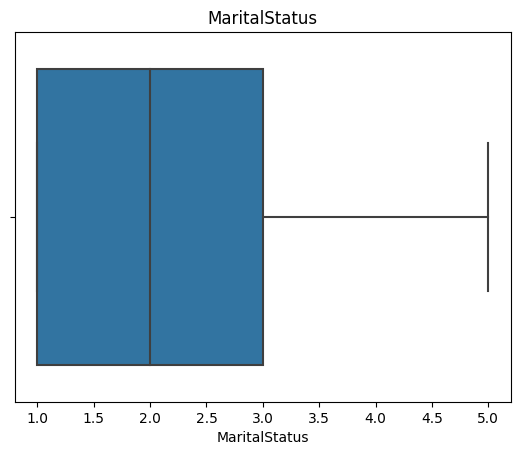

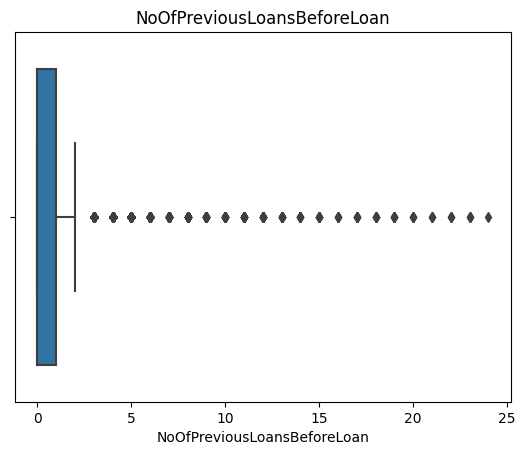

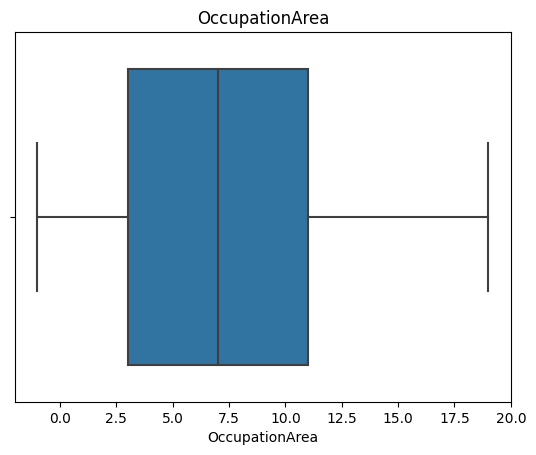

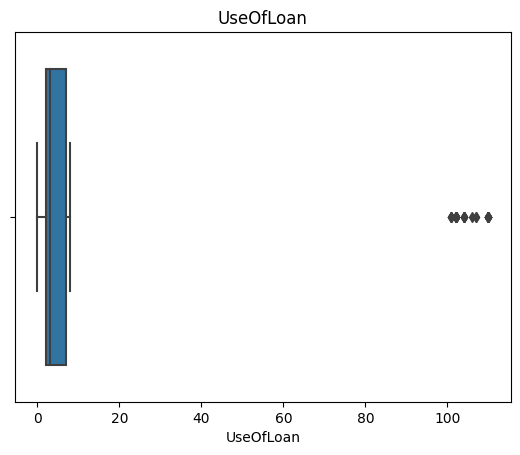

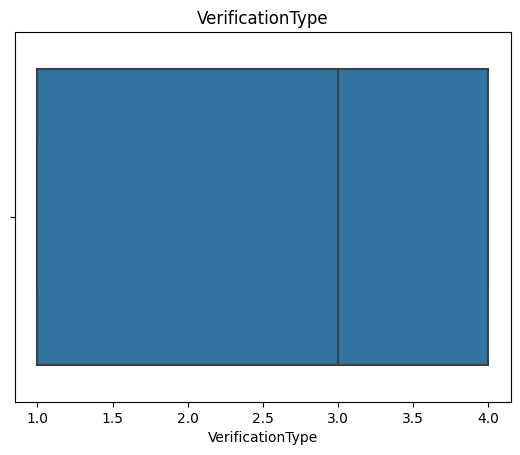

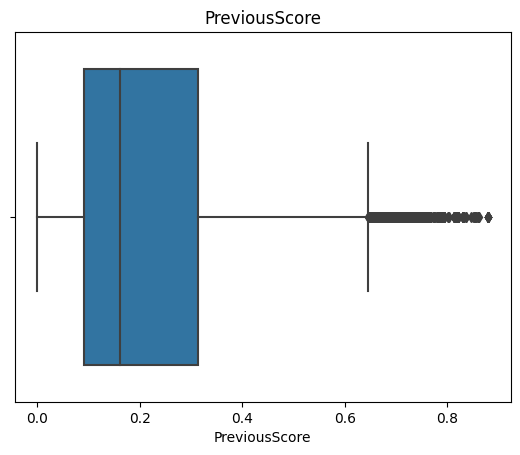

In [108]:
for i in numerical:
  sns.boxplot(data=df,x=i)
  plt.title(i)
  plt.show()

In [109]:
#creating a sub plot using seaborn for numerical values
num=df.select_dtypes(include=["int","float"]).columns.tolist()

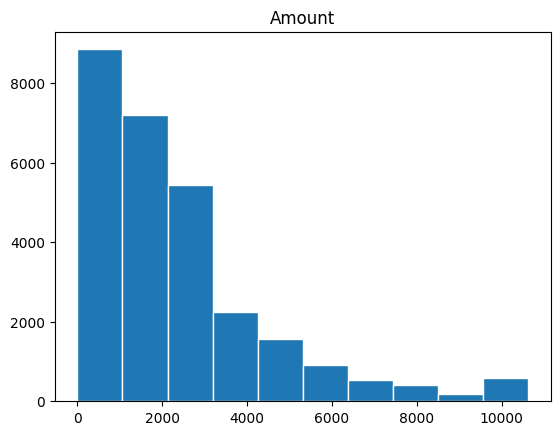

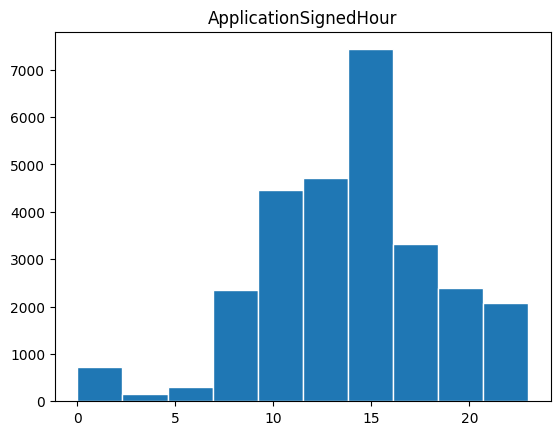

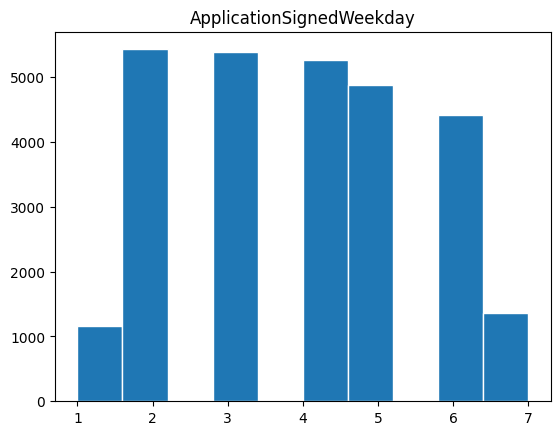

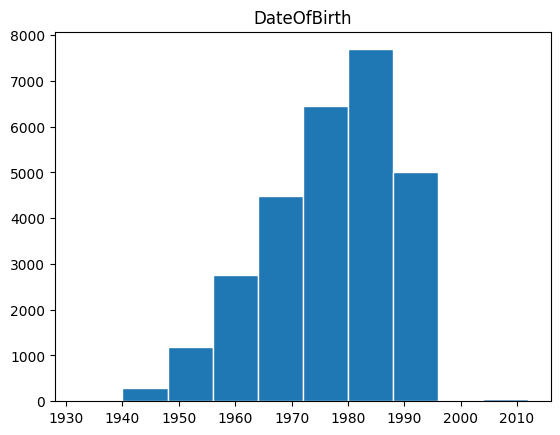

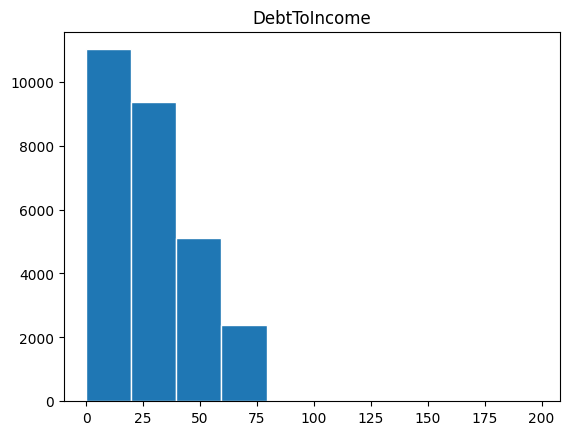

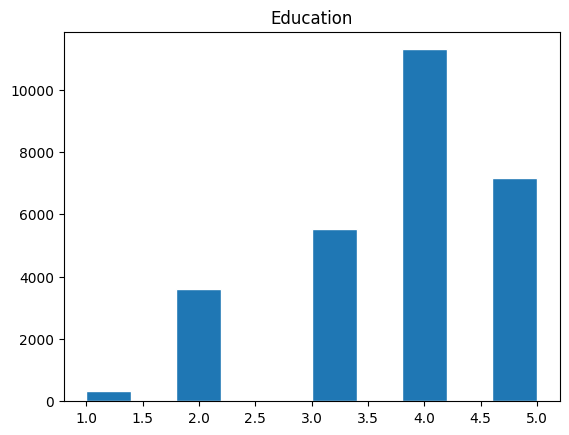

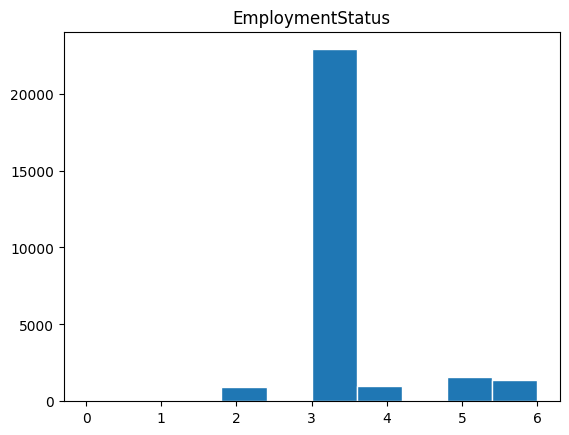

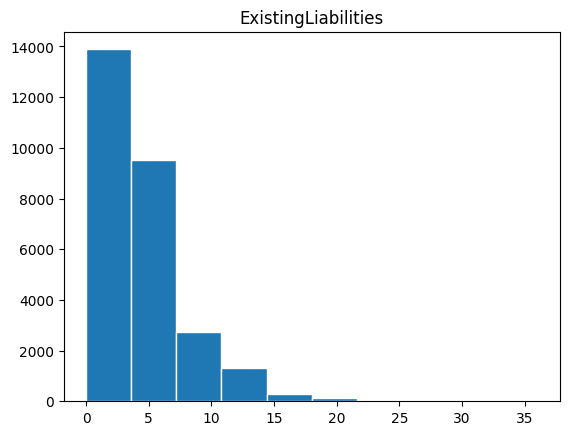

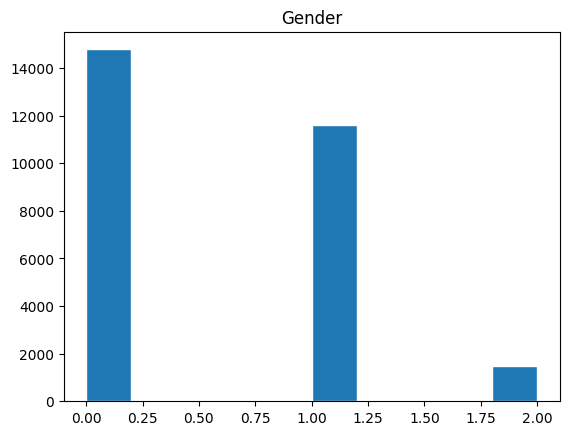

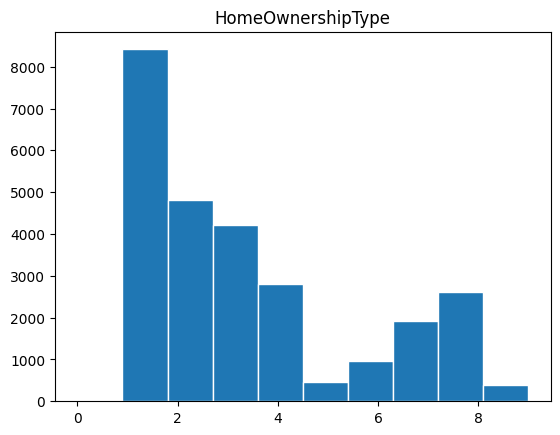

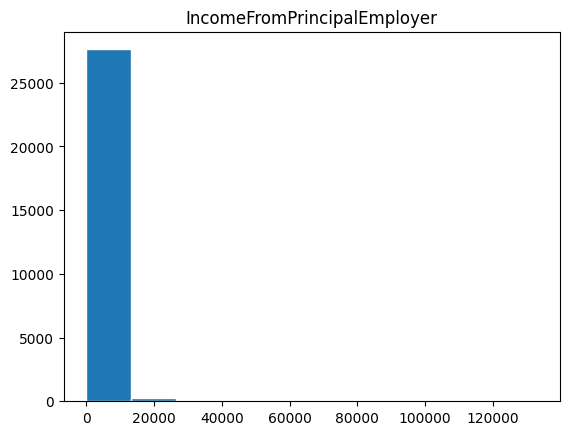

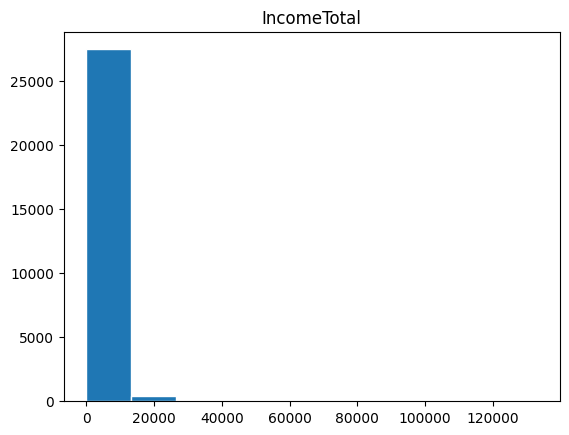

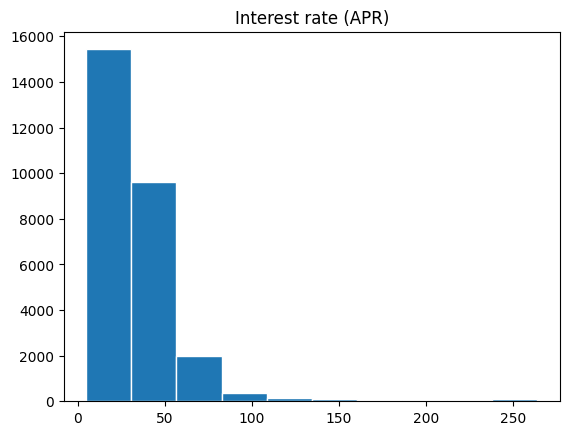

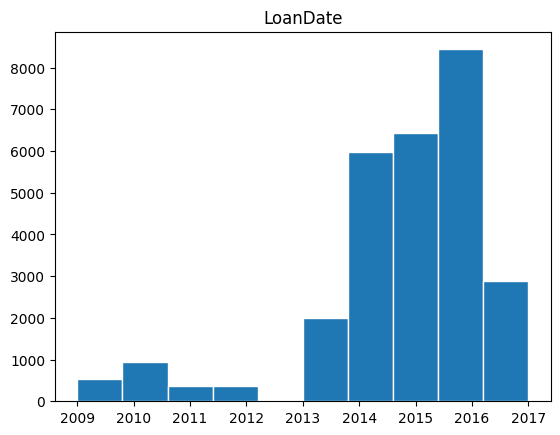

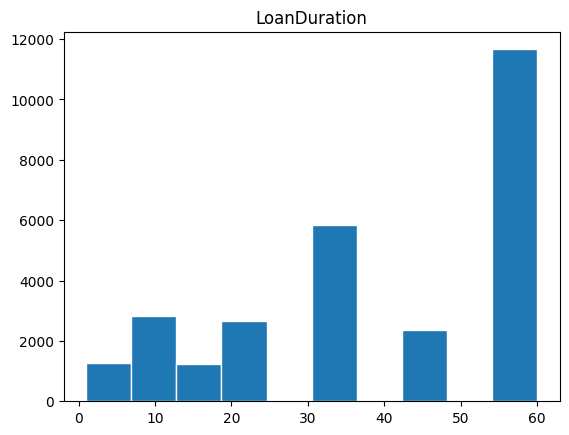

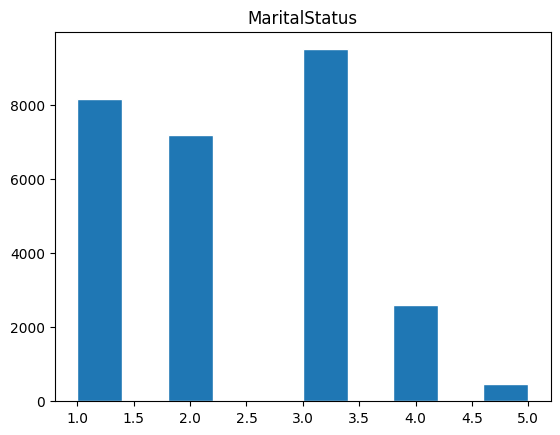

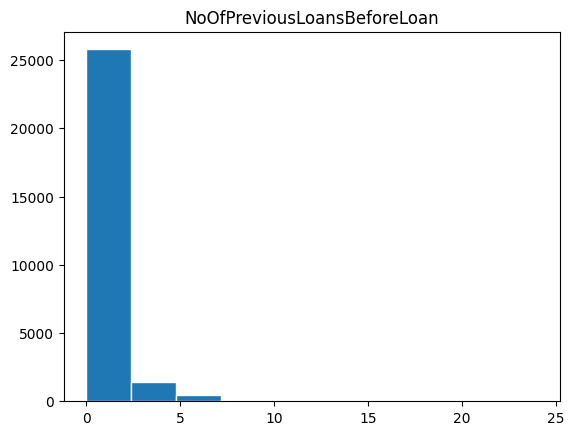

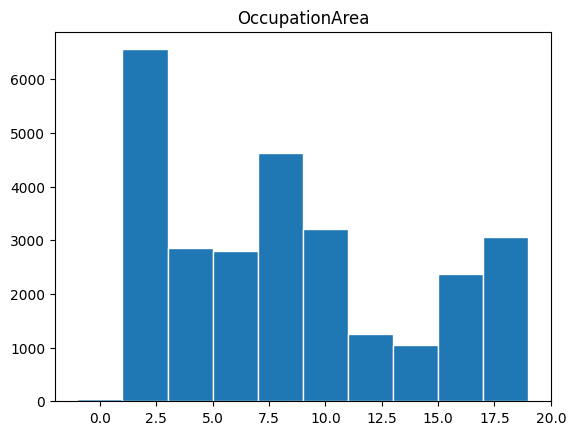

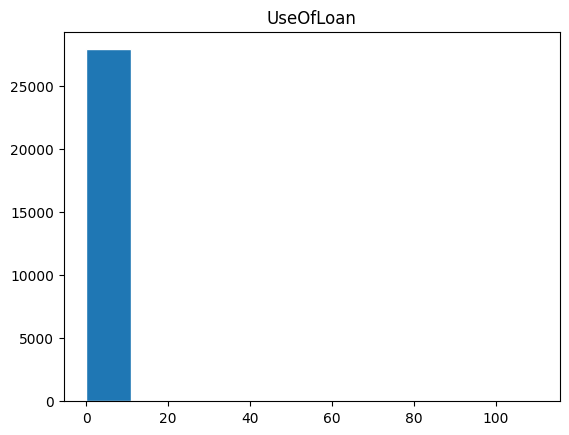

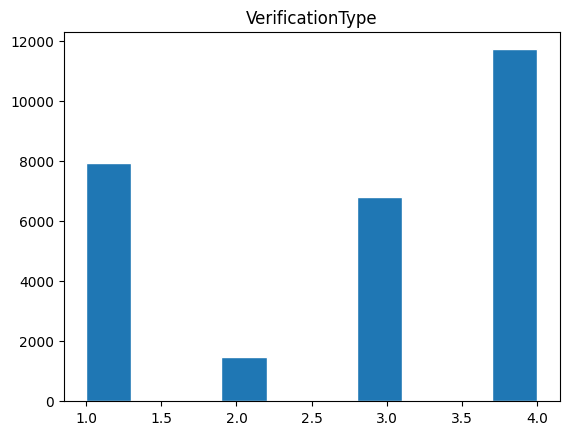

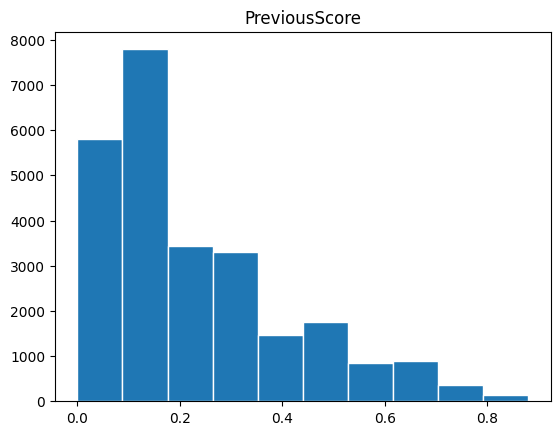

In [117]:
for i in num:
  plt.hist(data=df,x=i,edgecolor="w")
  plt.title(i)
  plt.show()

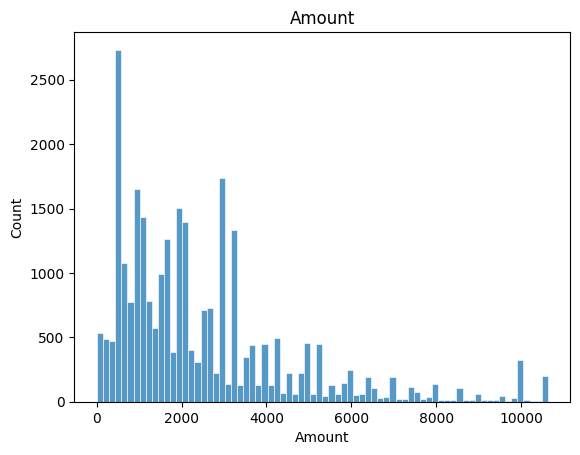

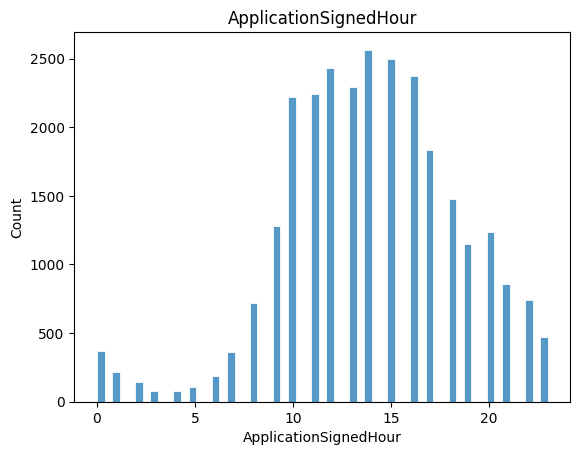

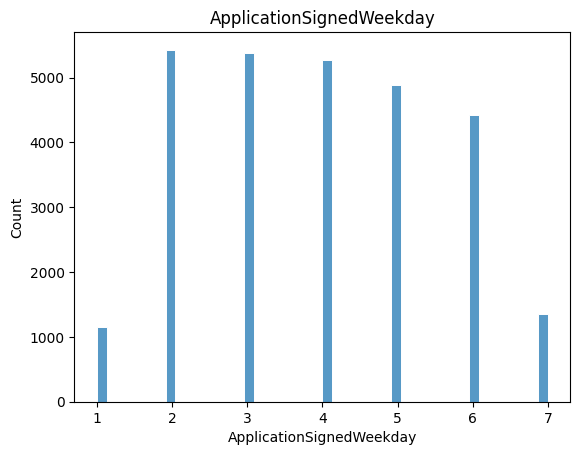

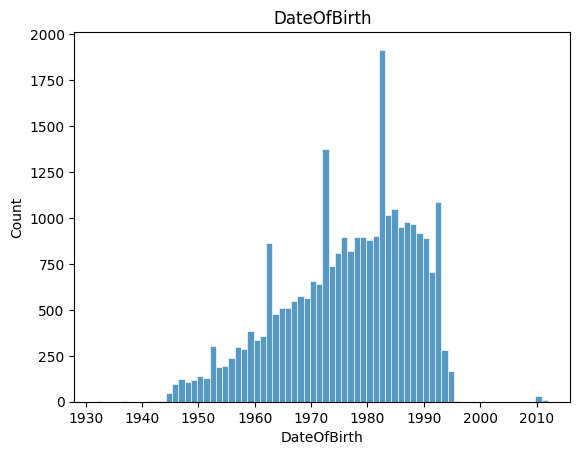

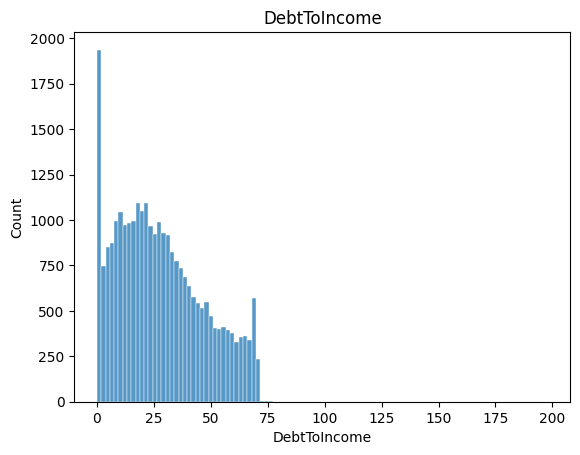

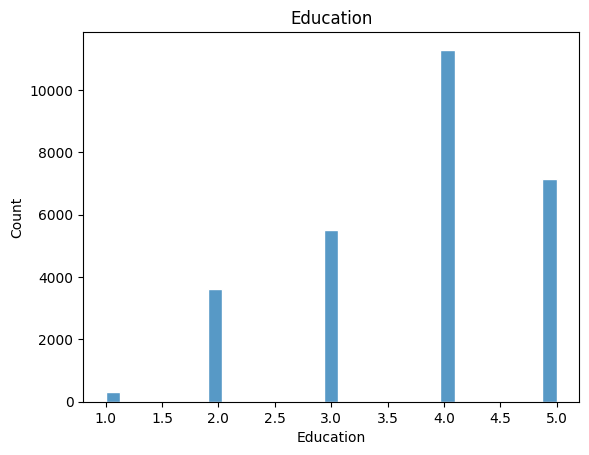

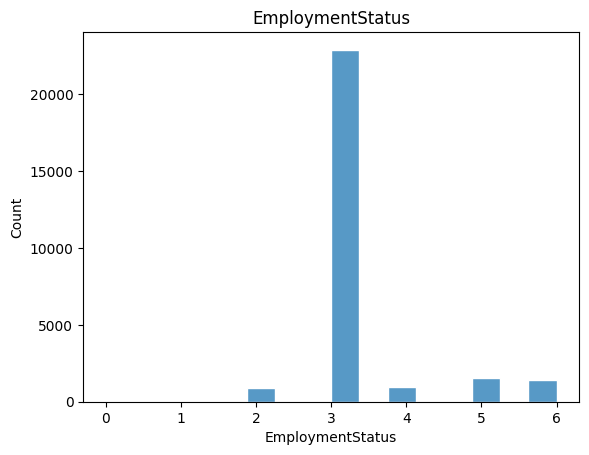

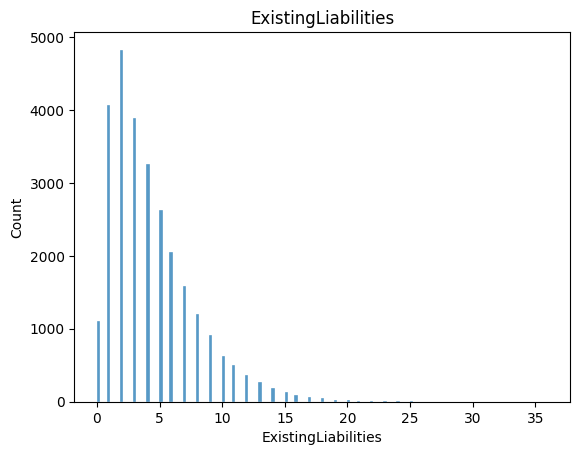

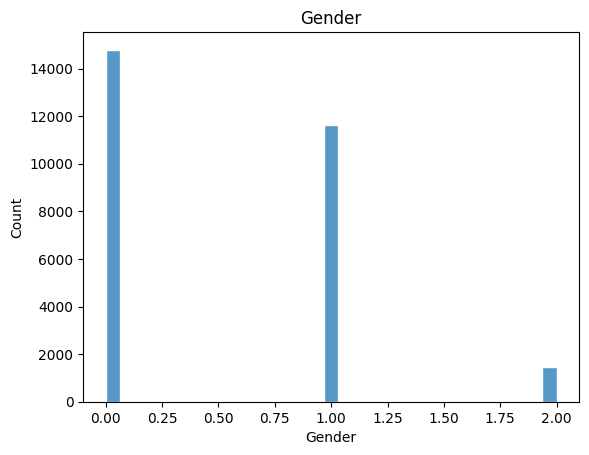

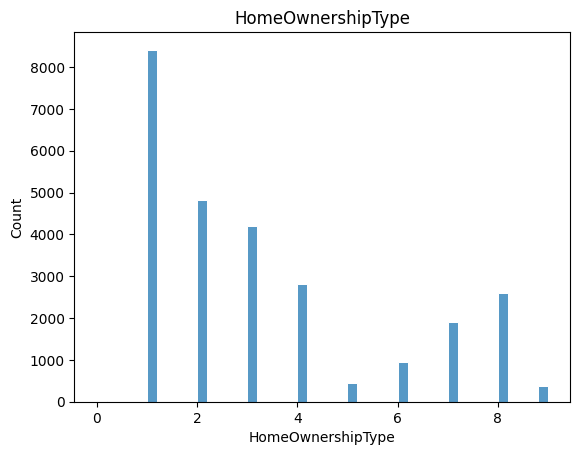

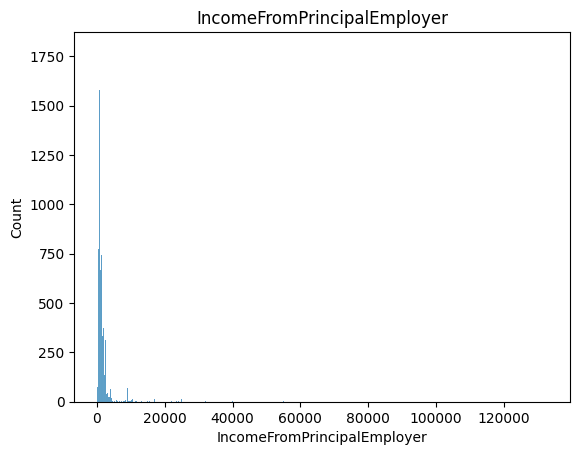

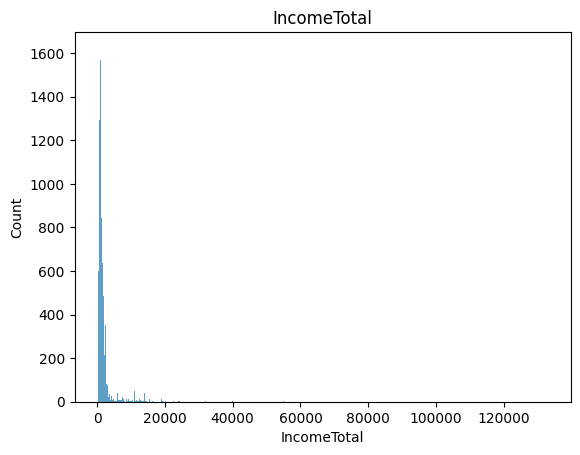

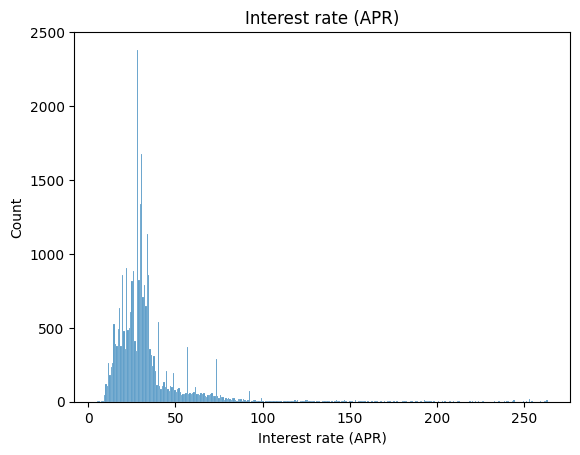

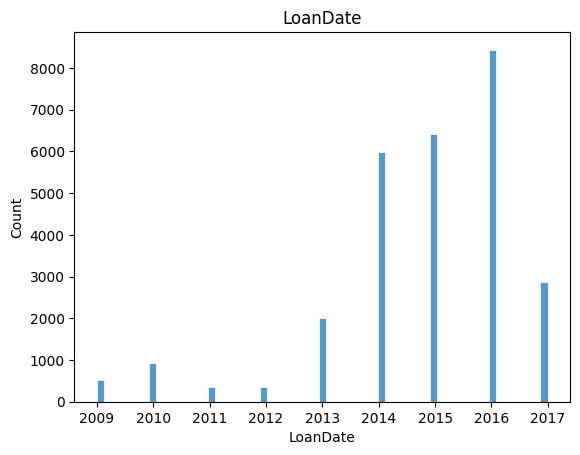

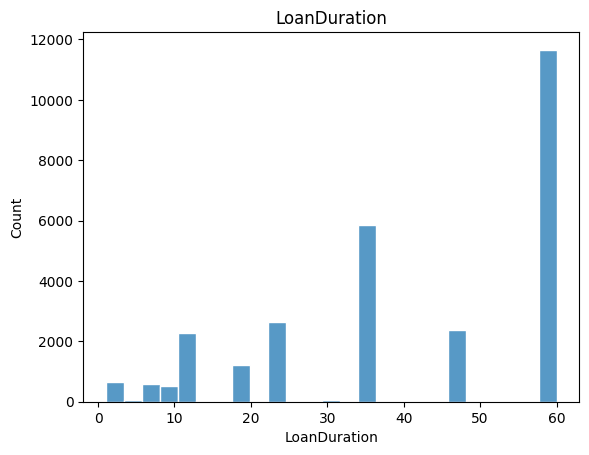

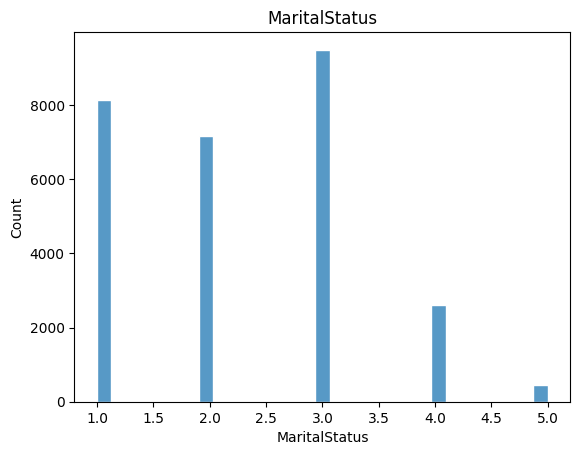

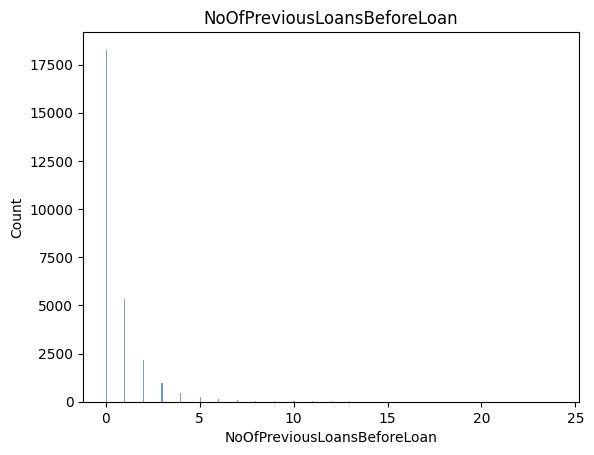

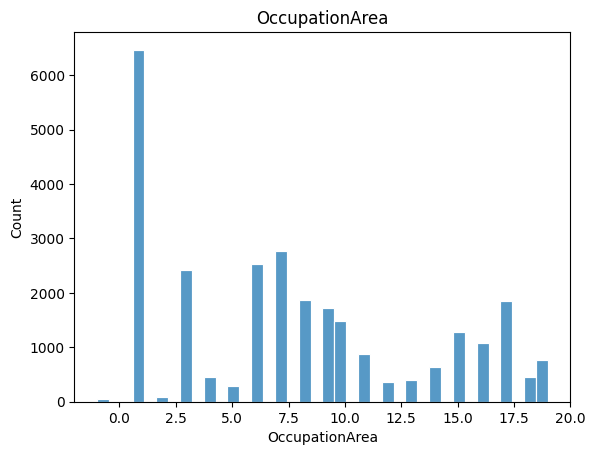

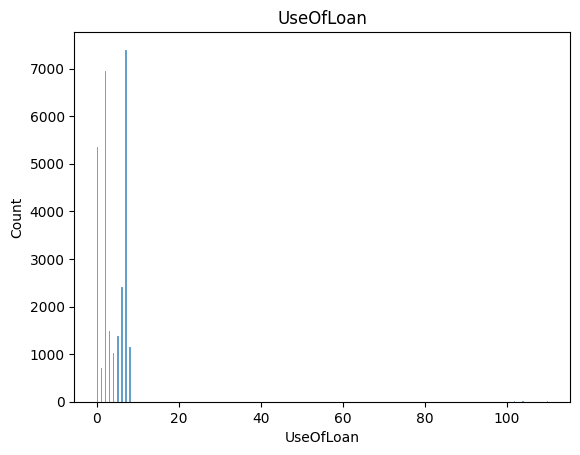

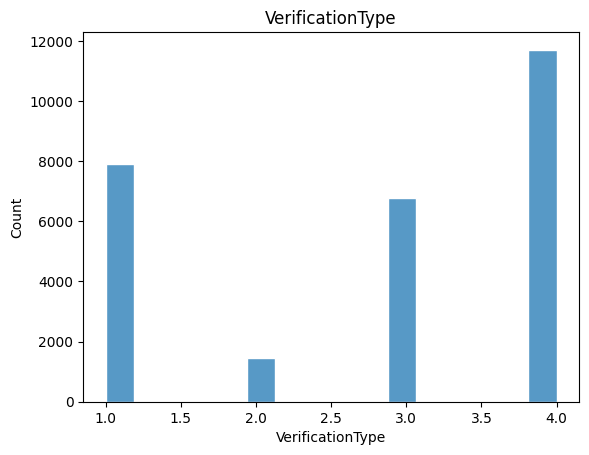

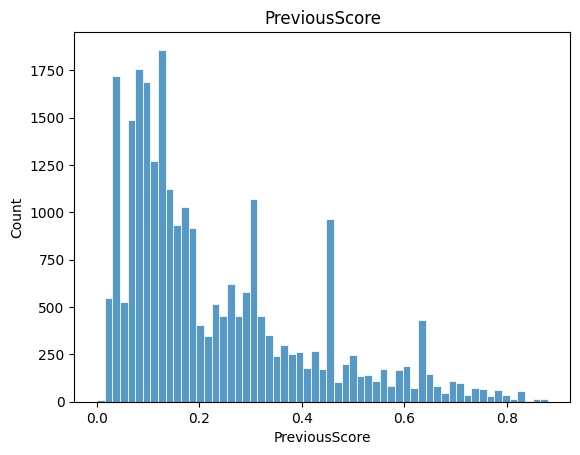

In [119]:
for i in num:
  sns.histplot(data=df,x=i,edgecolor="w")
  plt.title(i)
  plt.show()

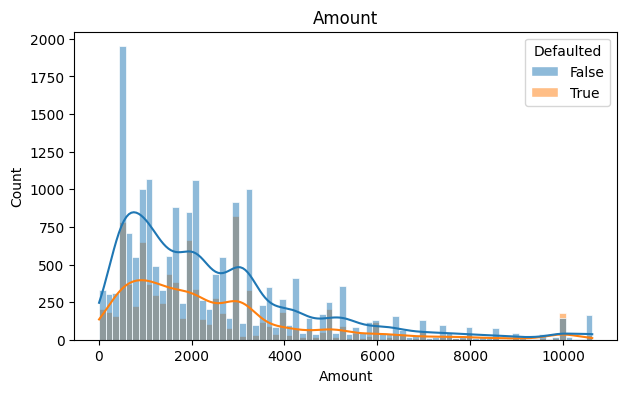

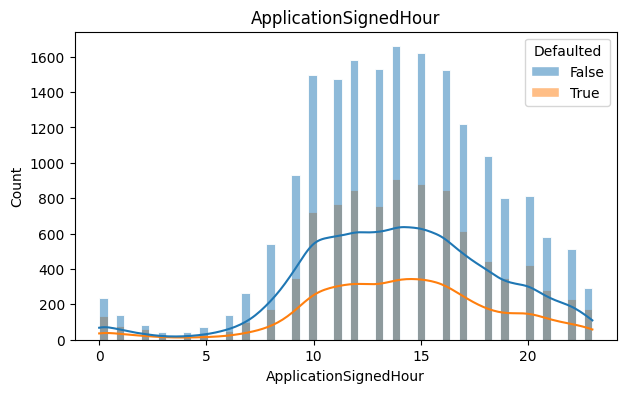

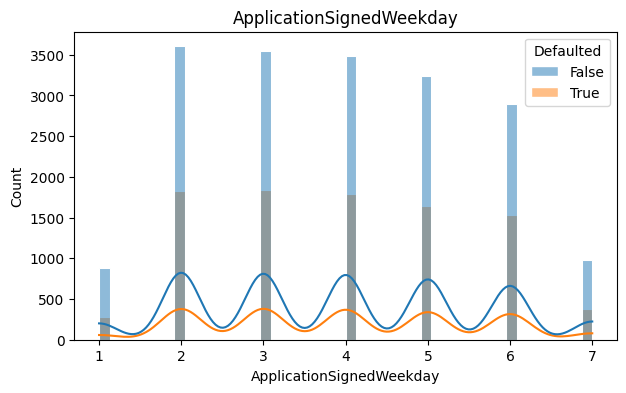

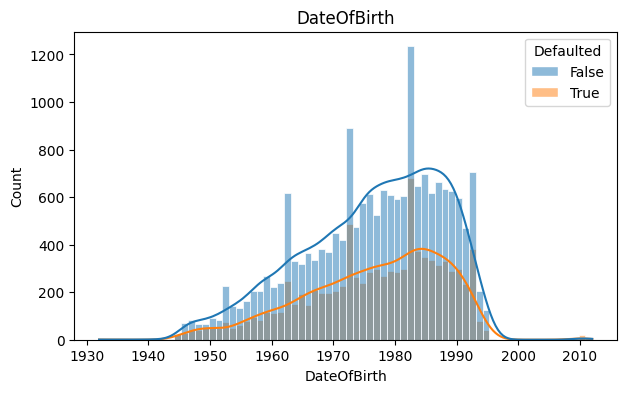

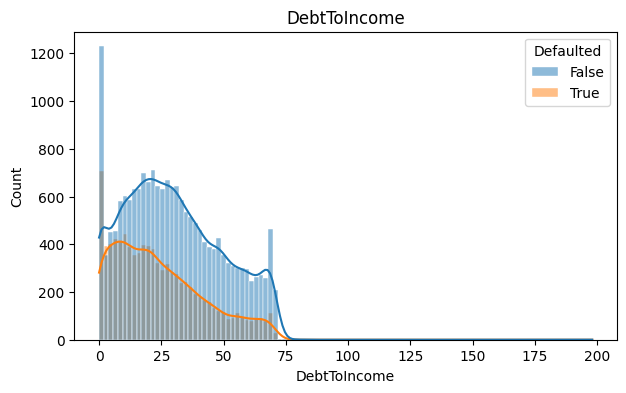

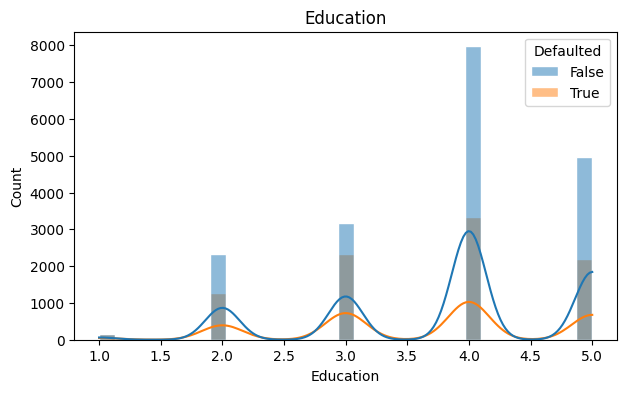

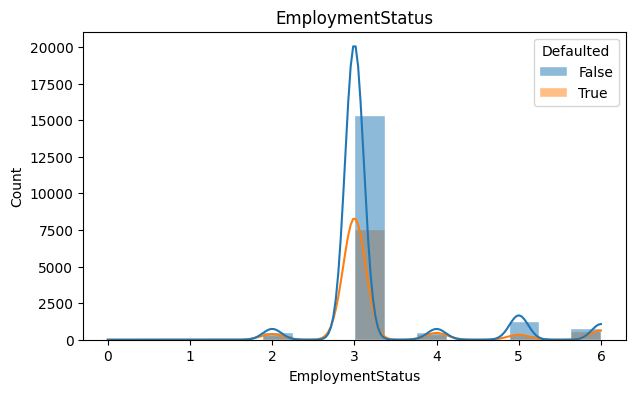

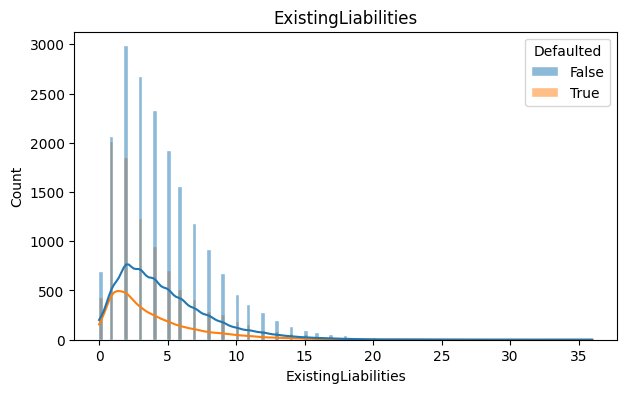

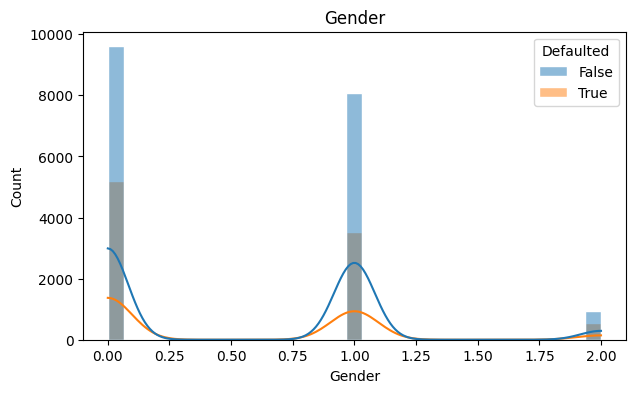

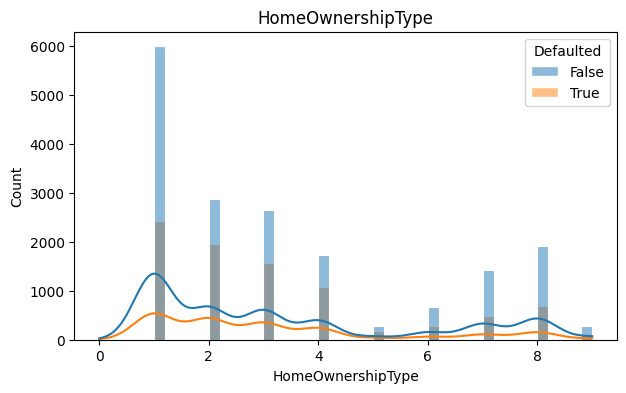

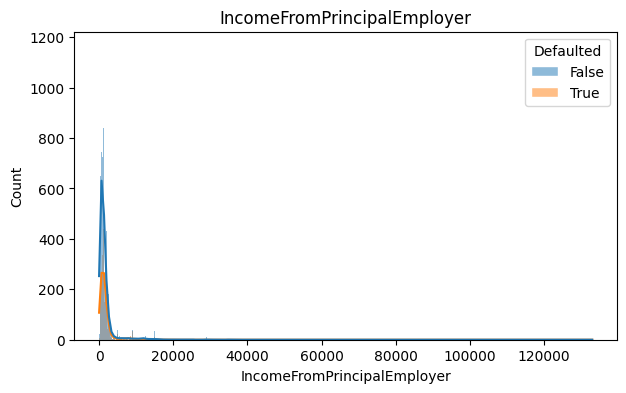

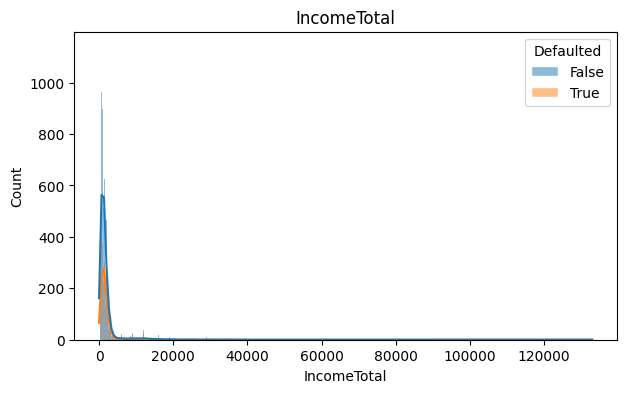

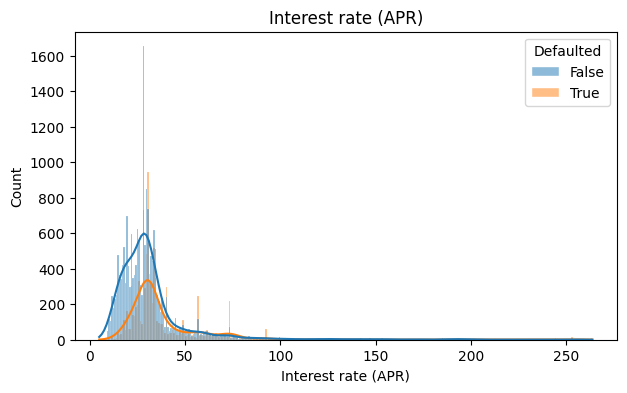

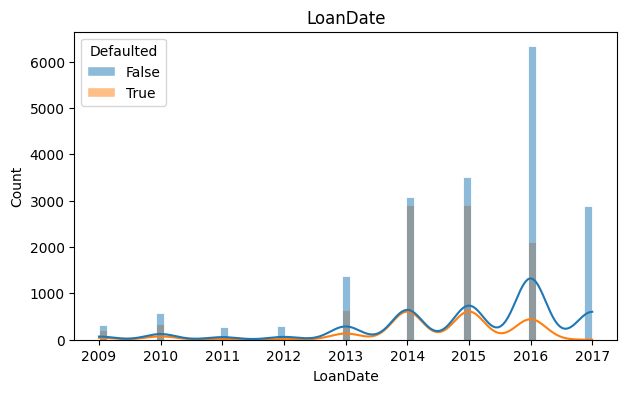

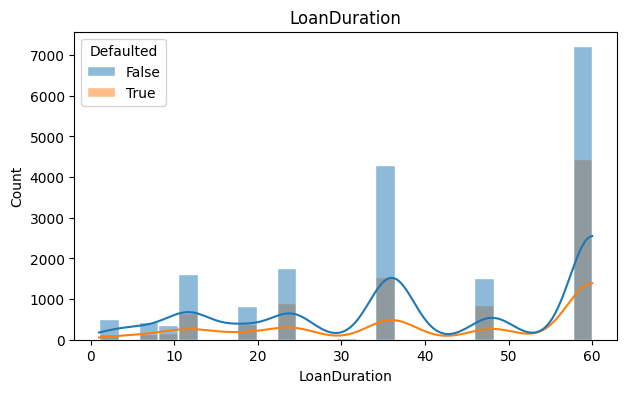

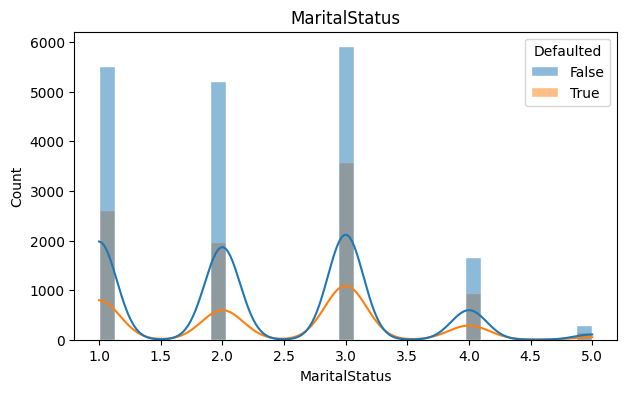

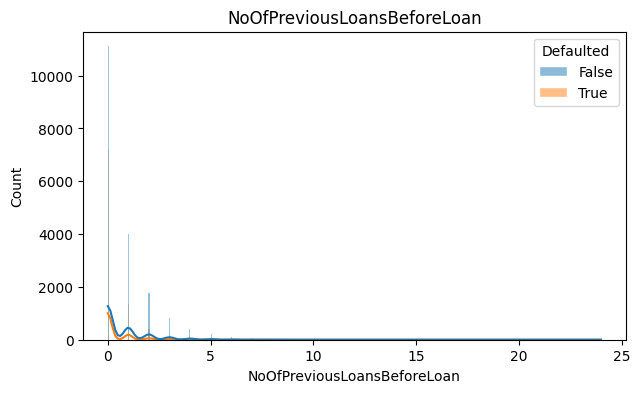

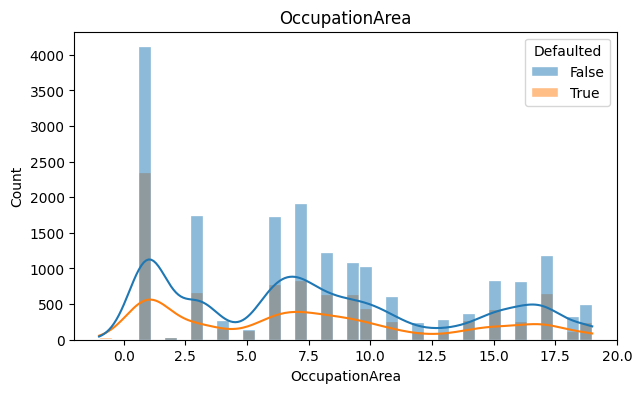

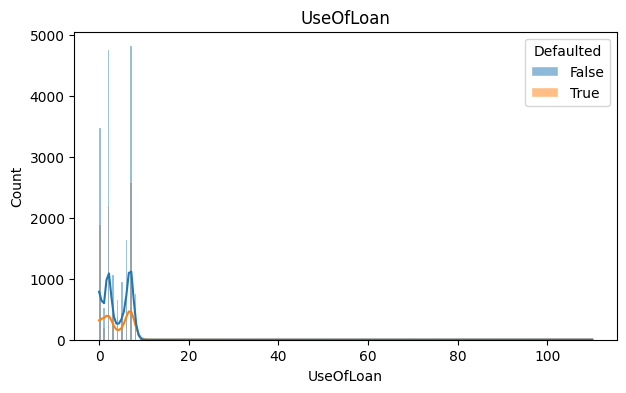

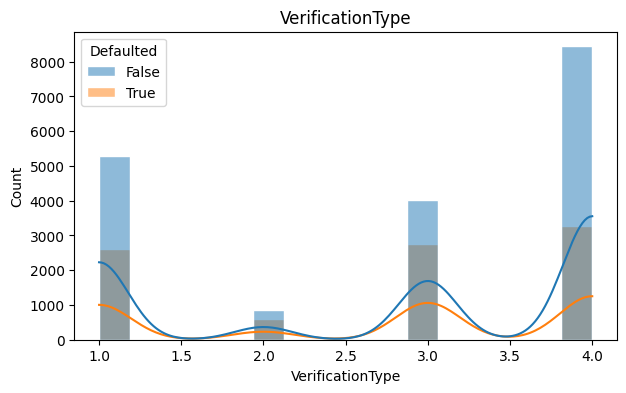

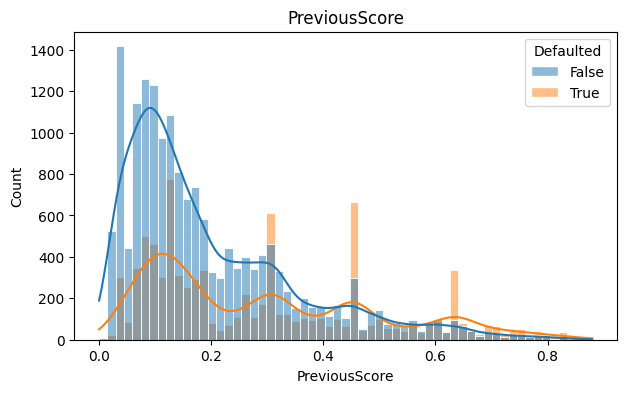

In [129]:
for i in num:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df,x=i,edgecolor="w",hue="Defaulted",kde=True)
  plt.title(i)
  plt.show()

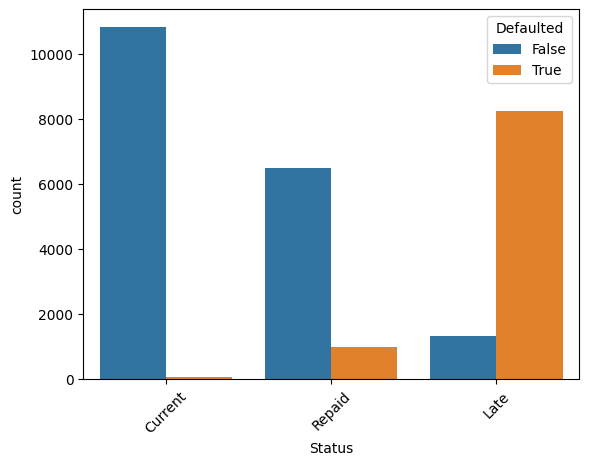

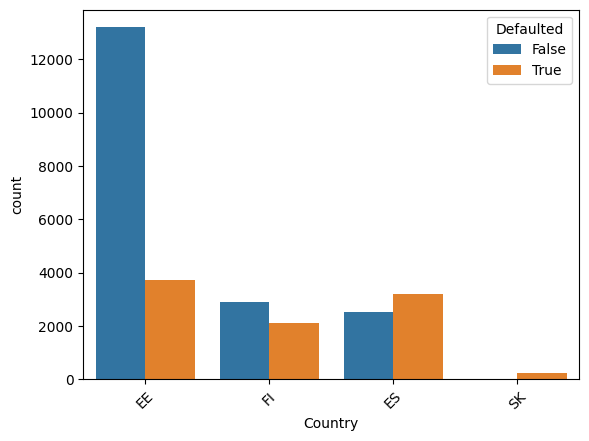

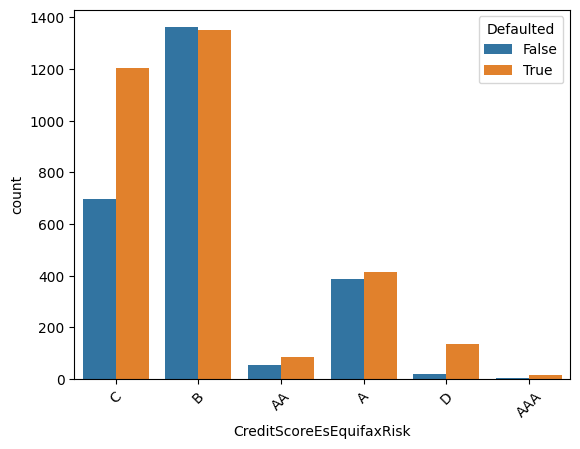

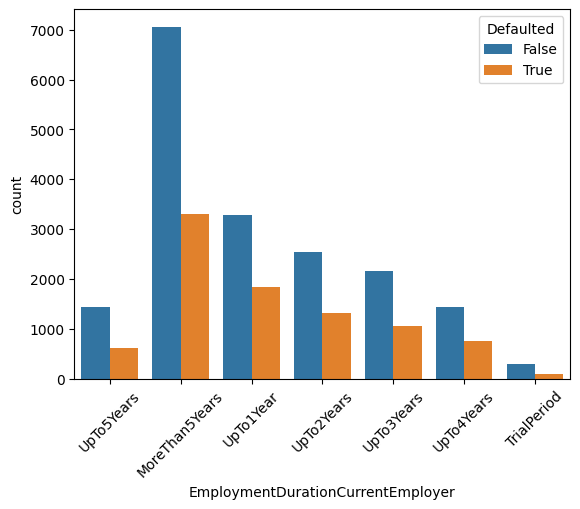

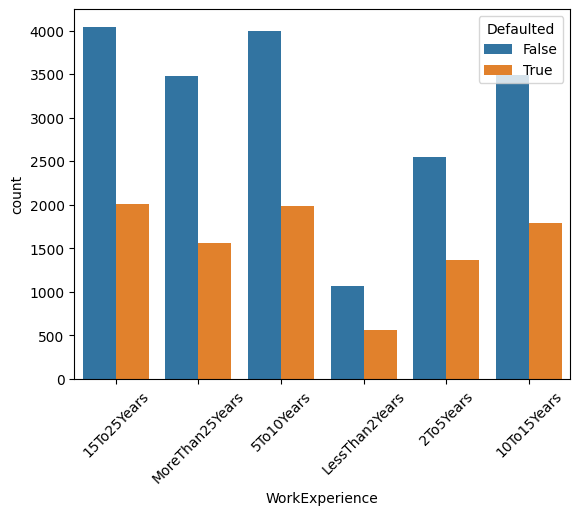

In [132]:
#creat subplots for the object type data
for i in categorical:
  sns.countplot(data=df,x=i,hue="Defaulted")
  plt.xticks(rotation=45)
  plt.show()

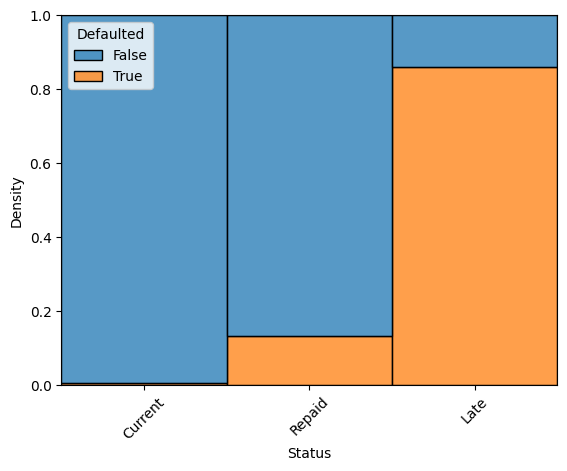

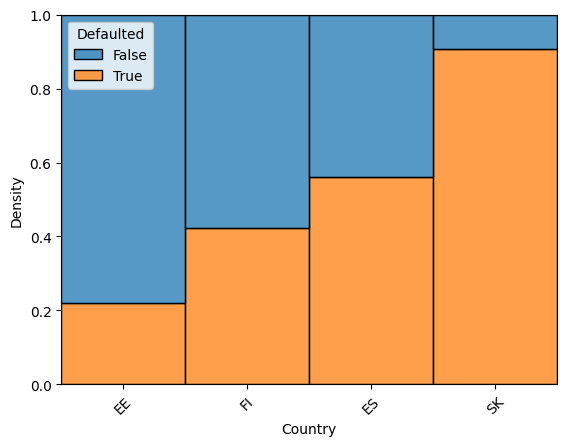

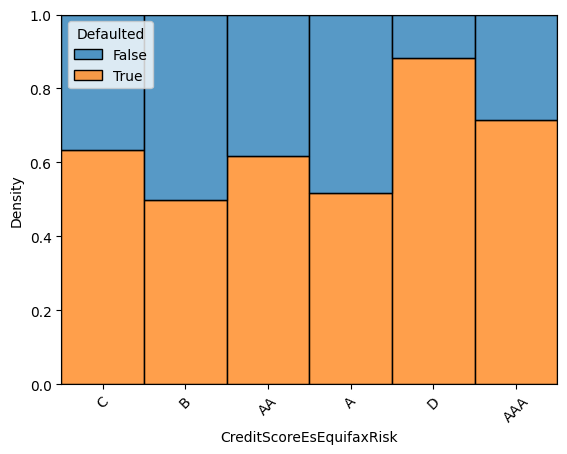

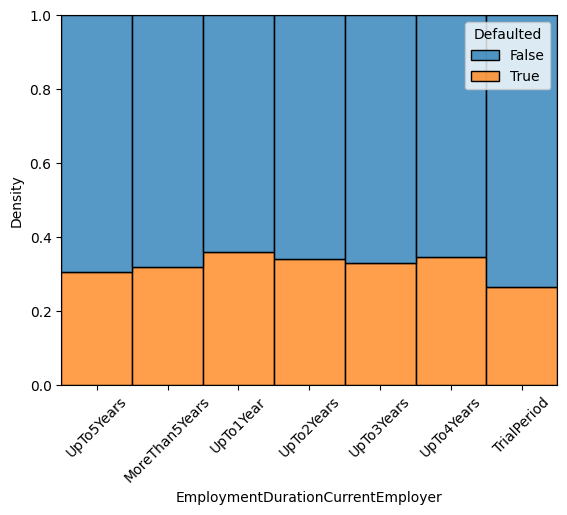

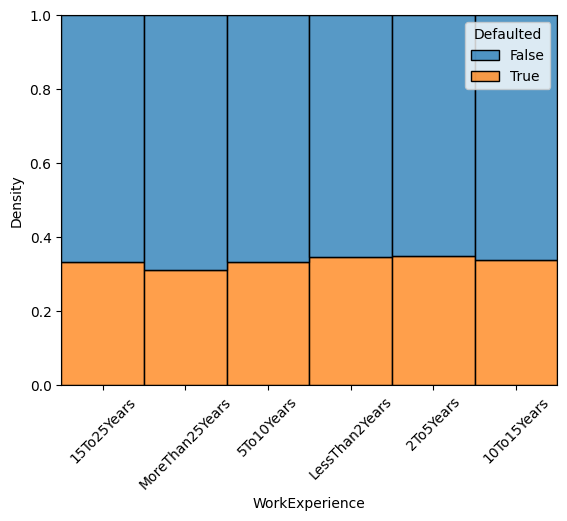

In [142]:
#creat subplots for the object type data
for i in categorical:
  sns.histplot(data=df,x=i,hue="Defaulted",kde=False,fill=True,stat="density",multiple="fill")
  plt.xticks(rotation=45)
  plt.show()